In [1]:
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [35]:
def plot_lines(file, drop_cc=False):
    
    df = pd.read_csv(file, skiprows=2)

    gt_col = df.columns[1]
    cc_col = df.columns[2]
    mon_norm_cc_col = 'monthly normalized '+df.columns[2]

    df['y-m-d'] = pd.to_datetime(df['Week'])

    df['month'] = df['y-m-d'].dt.month
    df['year'] = df['y-m-d'].dt.year
    
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        df.loc[df[gt_col] == '<1', gt_col] = '0'
    df[gt_col] = pd.to_numeric(df[gt_col])

    # normalize by month
    df[mon_norm_cc_col] = np.NaN
    for m in df['month'].unique(): 
#         with warnings.catch_warnings():
#             warnings.simplefilter(action='ignore', category=FutureWarning)
        df.loc[df['month'] == m, mon_norm_cc_col] = df.loc[df['month'] == m][cc_col] \
                                                    - df.loc[df['month'] == m][cc_col].mean()

    mean_df = df.groupby(['year', 'month'], as_index=False).mean()
    mean_df['date'] = pd.to_datetime(mean_df[['year', 'month']].assign(day=1))
    mean_df.drop(columns=['year', 'month'], inplace=True)
    
    cp = ['b', 'salmon', 'r']
    
    if drop_cc is True:
        mean_df.drop(columns=[cc_col], inplace=True)
        cp = ['b', 'r']

    plot_df = mean_df.melt('date', var_name='cols', value_name='vals')

    ax = sns.lineplot(x='date', y='vals', hue='cols', palette=cp, data=plot_df)
    
    plt.axhline(y=0, color='k', linestyle='--')
    
    plt.legend(bbox_to_anchor=(0.5, -0.5), loc=8, borderaxespad=0.5)
    plt.show()

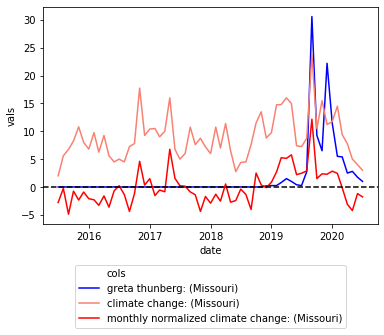

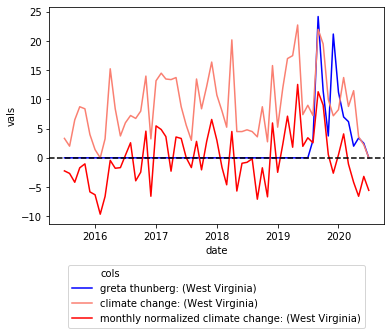

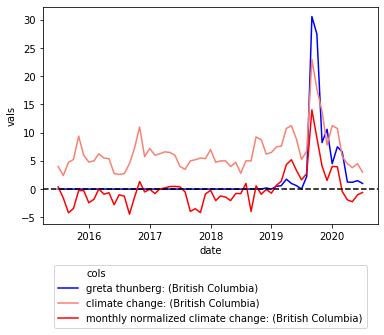

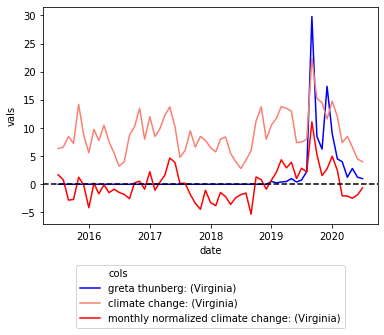

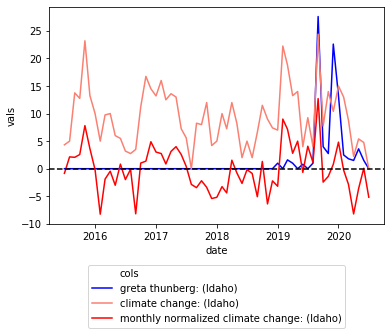

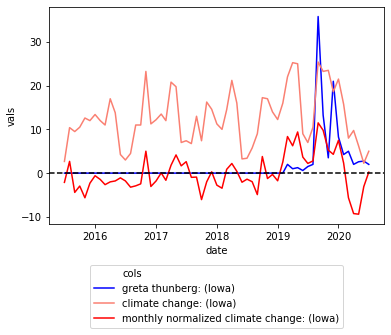

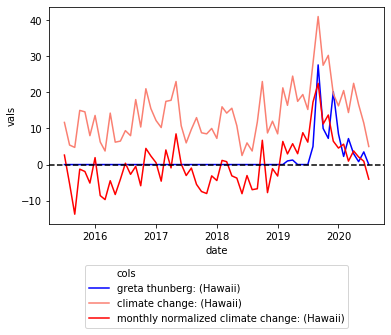

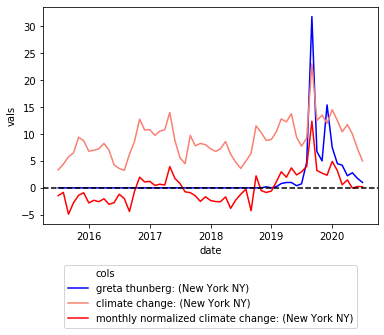

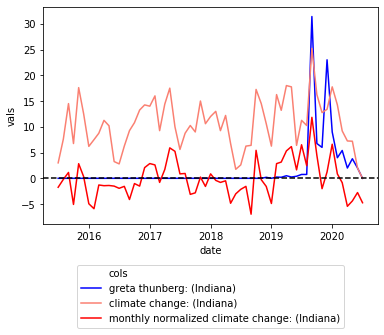

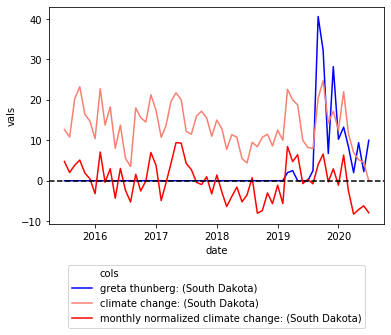

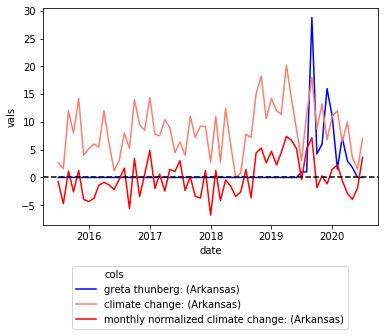

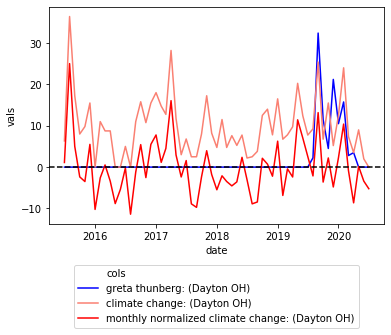

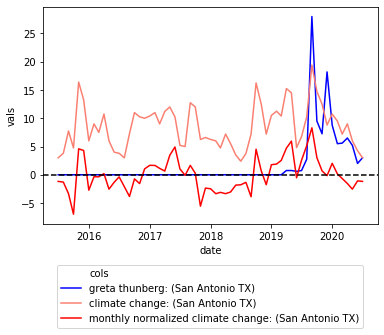

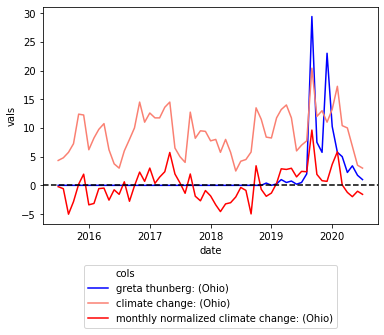

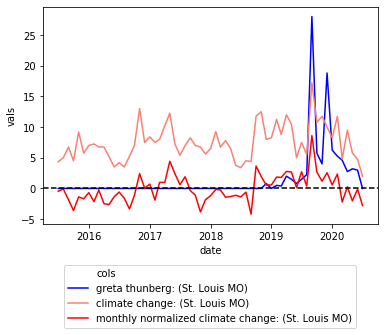

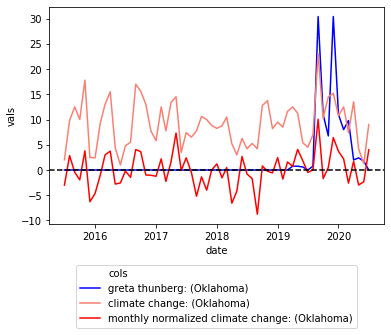

In [40]:
csv_files = glob.glob('*.csv')

for file in csv_files: 
    plot_lines(file)

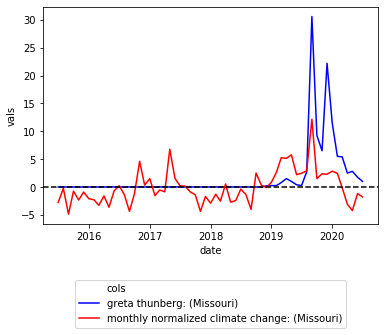

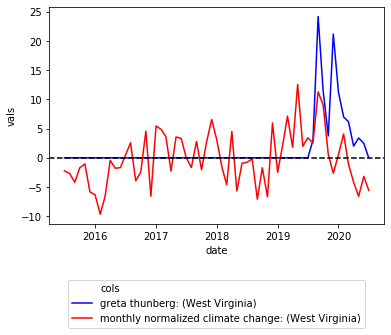

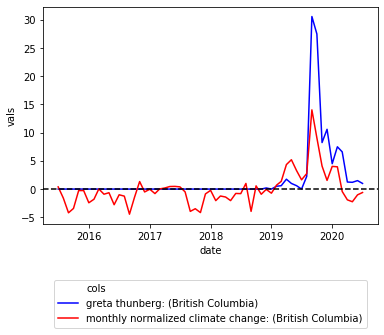

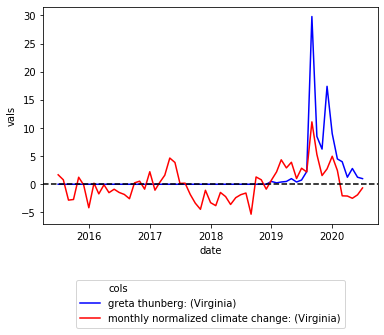

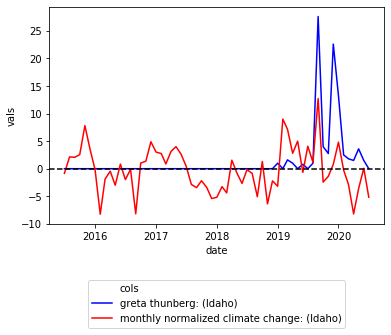

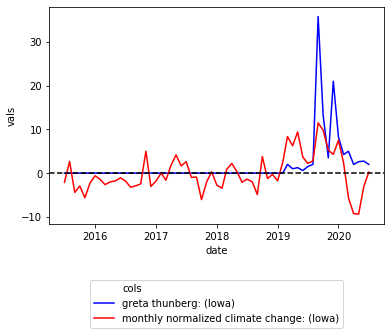

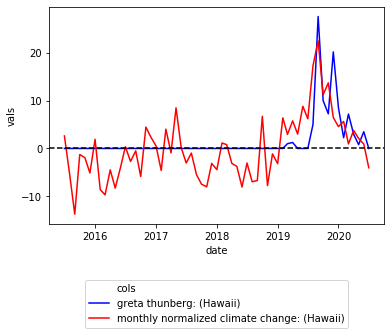

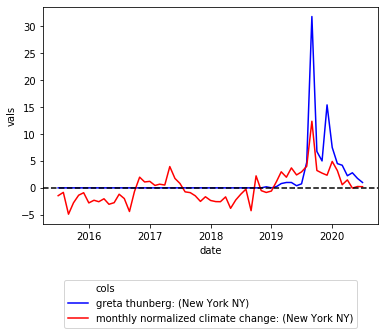

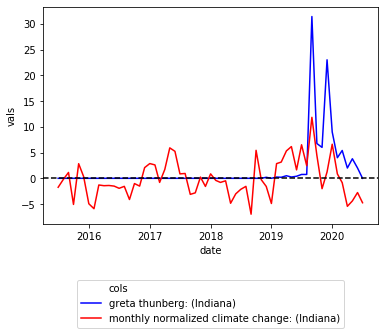

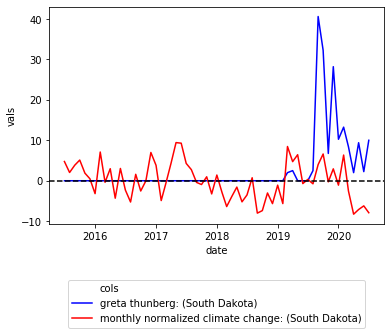

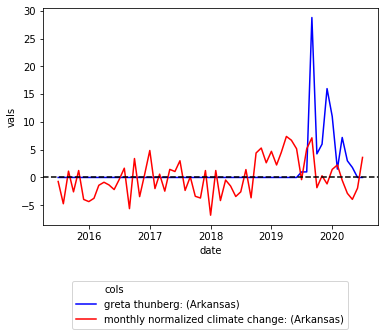

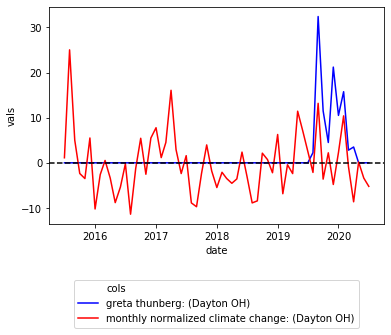

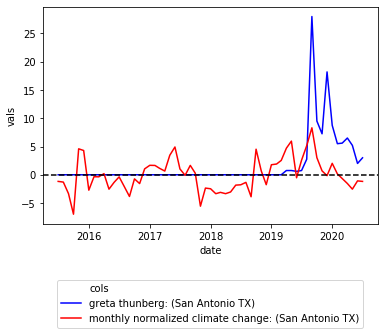

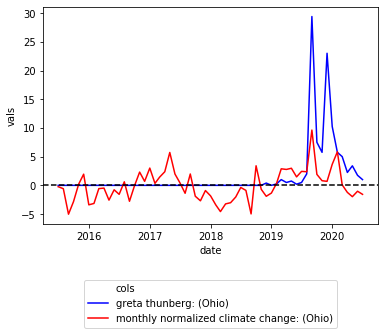

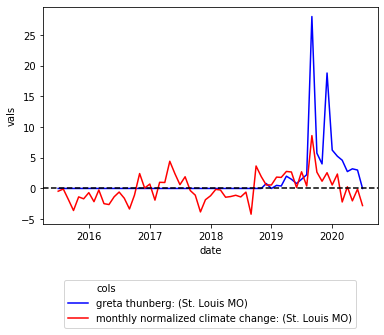

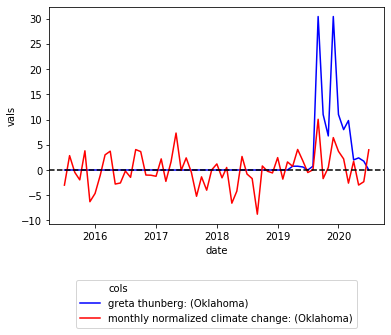

In [41]:
for file in csv_files: 
    plot_lines(file, drop_cc=True)

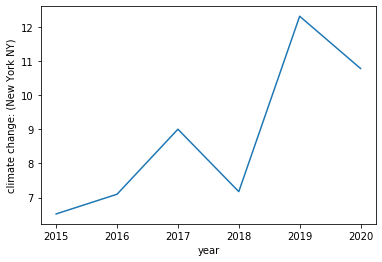

In [10]:
year_mean_df = df.groupby(['year'], as_index=False).mean()
ax = sns.lineplot(x='year', y='climate change: (New York NY)', data=year_mean_df)

In [22]:
month_mean_df = df.groupby(['month'], as_index=False).mean()

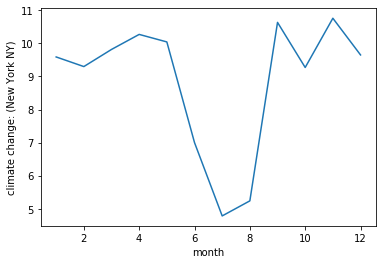

In [24]:
ax = sns.lineplot(x='month', y='climate change: (New York NY)', data=month_mean_df)

In [28]:
df

,Week,greta thunberg: (New York NY),climate change: (New York NY),y-m-d,month,year
0,2015-07-12,0,3,2015-07-12,7,2015
1,2015-07-19,0,3,2015-07-19,7,2015
2,2015-07-26,0,4,2015-07-26,7,2015
3,2015-08-02,0,8,2015-08-02,8,2015
4,2015-08-09,0,3,2015-08-09,8,2015
...,...,...,...,...,...,...
256,2020-06-07,2,12,2020-06-07,6,2020
257,2020-06-14,2,8,2020-06-14,6,2020
258,2020-06-21,2,5,2020-06-21,6,2020
259,2020-06-28,1,4,2020-06-28,6,2020


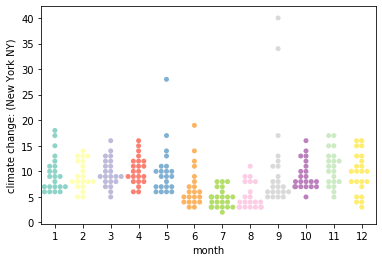

In [116]:
ax = sns.swarmplot(x='month', y='climate change: (New York NY)', data=df, palette='Set3')

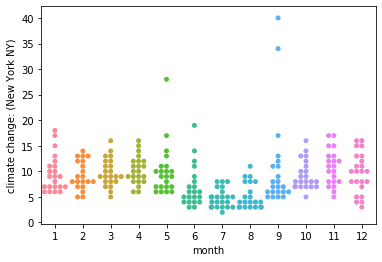

In [113]:
ax = sns.swarmplot(x='month', y='climate change: (New York NY)', data=df)

In [32]:
mean_df

,greta thunberg: (New York NY),climate change: (New York NY),date
0,0.00,3.333333,2015-07-01
1,0.00,4.400000,2015-08-01
2,0.00,5.750000,2015-09-01
3,0.00,6.500000,2015-10-01
4,0.00,9.400000,2015-11-01
...,...,...,...
56,4.20,10.400000,2020-03-01
57,2.25,11.750000,2020-04-01
58,2.80,10.000000,2020-05-01
59,1.75,7.250000,2020-06-01


In [56]:
df.loc[df['month'] == 6]['climate change: (New York NY)'].mean()

7.0

In [70]:
df['month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [89]:
df['cc month-norm'] = np.NaN
for m in df['month'].unique(): 
    df.loc[df['month'] == m, 'cc month-norm'] = df.loc[df['month'] == m]['climate change: (New York NY)'] \
                                                - df.loc[df['month'] == m]['climate change: (New York NY)'].mean()

In [90]:
df

,Week,greta thunberg: (New York NY),climate change: (New York NY),y-m-d,month,year,cc month-norm
0,2015-07-12,0,3,2015-07-12,7,2015,-1.782609
1,2015-07-19,0,3,2015-07-19,7,2015,-1.782609
2,2015-07-26,0,4,2015-07-26,7,2015,-0.782609
3,2015-08-02,0,8,2015-08-02,8,2015,2.761905
4,2015-08-09,0,3,2015-08-09,8,2015,-2.238095
...,...,...,...,...,...,...,...
256,2020-06-07,2,12,2020-06-07,6,2020,5.000000
257,2020-06-14,2,8,2020-06-14,6,2020,1.000000
258,2020-06-21,2,5,2020-06-21,6,2020,-2.000000
259,2020-06-28,1,4,2020-06-28,6,2020,-3.000000


In [93]:
norm_mean_df = df.groupby(['year', 'month'], as_index=False).mean()

norm_mean_df['date'] = pd.to_datetime(norm_mean_df[['year', 'month']].assign(day=1))

In [94]:
norm_mean_df

,year,month,greta thunberg: (New York NY),climate change: (New York NY),cc month-norm,date
0,2015,7,0.00,3.333333,-1.449275,2015-07-01
1,2015,8,0.00,4.400000,-0.838095,2015-08-01
2,2015,9,0.00,5.750000,-4.886364,2015-09-01
3,2015,10,0.00,6.500000,-2.772727,2015-10-01
4,2015,11,0.00,9.400000,-1.361905,2015-11-01
...,...,...,...,...,...,...
56,2020,3,4.20,10.400000,0.581818,2020-03-01
57,2020,4,2.25,11.750000,1.477273,2020-04-01
58,2020,5,2.80,10.000000,-0.045455,2020-05-01
59,2020,6,1.75,7.250000,0.250000,2020-06-01


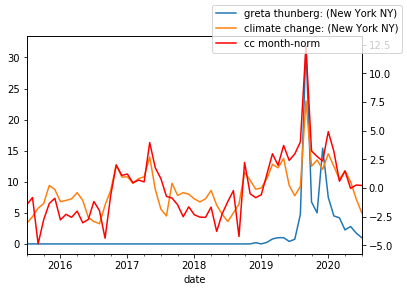

In [107]:
ax = norm_mean_df.plot(x='date', y=['greta thunberg: (New York NY)', 'climate change: (New York NY)'], legend=False)
ax2 = ax.twinx()
norm_mean_df.plot(x='date', y='cc month-norm', ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

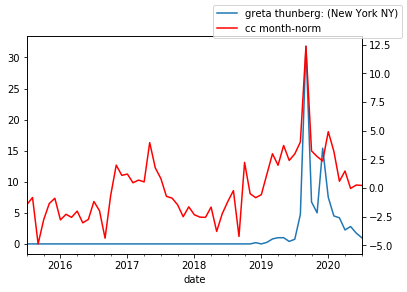

In [108]:
ax = norm_mean_df.plot(x='date', y=['greta thunberg: (New York NY)'], legend=False)
ax2 = ax.twinx()
norm_mean_df.plot(x='date', y='cc month-norm', ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [110]:
norm_mean_df.loc[norm_mean_df['month'] == 12]

,year,month,greta thunberg: (New York NY),climate change: (New York NY),cc month-norm,date
5,2015,12,0.0,8.75,-0.902174,2015-12-01
17,2016,12,0.0,10.75,1.097826,2016-12-01
29,2017,12,0.0,8.00,-1.652174,2017-12-01
41,2018,12,0.2,8.80,-0.852174,2018-12-01
53,2019,12,15.4,12.00,2.347826,2019-12-01


In [ ]:
mean_df = df.groupby(['year', 'month'], as_index=False).mean()

mean_df['date'] = pd.to_datetime(mean_df[['year', 'month']].assign(day=1))

mean_df.drop(columns=['year', 'month'], inplace=True)